Code for **"Flash/No Flash"** figure. 

# Import libs

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '3'

import numpy as np
from models import *

import torch
import torch.optim

from utils.denoising_utils import *
from utils.sr_utils import load_LR_HR_imgs_sr
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True
dtype = torch.cuda.FloatTensor
# dtype = torch.FloatTensor

imsize =-1
PLOT = True
# del net
torch.cuda.empty_cache()

# Load image

HR and LR resolutions: (768, 704), (768, 704)
HR and LR resolutions: (768, 704), (768, 704)
HR and LR resolutions: (768, 704), (768, 704)


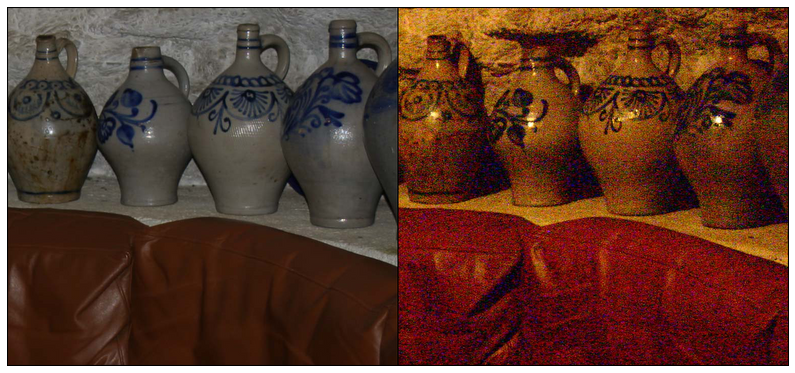

In [2]:
imgs = load_LR_HR_imgs_sr('data/flash_no_flash/cave01_00_flash.jpg', -1, 1, enforse_div32='CROP')
img_flash = load_LR_HR_imgs_sr('data/flash_no_flash/cave01_00_flash.jpg', -1, 1, enforse_div32='CROP')['HR_pil']
img_flash_np = pil_to_np(img_flash)

img_noflash = load_LR_HR_imgs_sr('data/flash_no_flash/cave01_01_noflash.jpg', -1, 1, enforse_div32='CROP')['HR_pil']
img_noflash_np = pil_to_np(img_noflash)

g = plot_image_grid([img_flash_np, img_noflash_np],3,12)

# Setup

In [3]:
pad = 'reflection'
OPT_OVER = 'net'

num_iter = 601
LR = 0.1 
OPTIMIZER = 'adam'
reg_noise_std = 0.0
show_every = 50
figsize = 6

# We will use flash image as input
input_depth = 3
net_input =np_to_torch(img_flash_np).type(dtype)

In [4]:
nchan = 80
net = skip(input_depth, 3, num_channels_down = [nchan]*5, 
                        num_channels_up   = [nchan]*5,
                        num_channels_skip = [4, 4, 4, 4, 4], 
                        upsample_mode=['nearest', 'nearest', 'bilinear', 'bilinear', 'bilinear'], 
                        need_sigmoid=True, need_bias=True, pad=pad).type(dtype)

mse = torch.nn.MSELoss().type(dtype)

img_flash_var = np_to_torch(img_flash_np).type(dtype)
img_noflash_var = np_to_torch(img_noflash_np).type(dtype)

In [5]:
from pdb import set_trace
import cv2
def _init_dcvx_parameters(net_to_dcvx):
    # parameters = [p for p in self.image_net.named_parameters()] + \
    #              [p for p in self.mask_net.named_parameters()]
    #     net_to_dcvx = [self.left_net,self.right_net]
    # if self._is_learning_ambient():
    #     net_to_dcvx.append(self.ambient_net)

    # set_trace()
    parameters = list()
    for net in net_to_dcvx:
        # for name, p  in net.named_parameters():
        #     print(name, end=' ')
        layer_id = 0
        # set_trace()
        for name, p  in net.named_parameters():
            layer_id +=1
            if "weight" in name and layer_id>7 and p.dim()>1:
                parameters.append(p)
                print(name)
    return parameters

def dcvx(parameters):
    neg_weight_reg  = 0.0 
    #parameters =self.dcvx_parameters
    for p in parameters:
        neg_weight_reg += torch.norm(p[p<0])
    return neg_weight_reg

dcvx_ = 1
dcvx_coeff= 0.000001
parameters = _init_dcvx_parameters([net])


1.1.4.1.weight
1.1.7.1.0.1.1.weight
1.1.7.1.1.1.1.weight
1.1.7.1.1.4.1.weight
1.1.7.1.1.7.1.0.1.1.weight
1.1.7.1.1.7.1.1.1.1.weight
1.1.7.1.1.7.1.1.4.1.weight
1.1.7.1.1.7.1.1.7.1.0.1.1.weight
1.1.7.1.1.7.1.1.7.1.1.1.1.weight
1.1.7.1.1.7.1.1.7.1.1.4.1.weight
1.1.7.1.1.7.1.1.7.1.1.7.1.0.1.1.weight
1.1.7.1.1.7.1.1.7.1.1.7.1.1.1.1.weight
1.1.7.1.1.7.1.1.7.1.1.7.1.1.4.1.weight
1.1.7.1.1.7.1.1.7.1.1.7.3.1.weight
1.1.7.1.1.7.1.1.7.1.1.7.6.1.weight
1.1.7.1.1.7.1.1.7.3.1.weight
1.1.7.1.1.7.1.1.7.6.1.weight
1.1.7.1.1.7.3.1.weight
1.1.7.1.1.7.6.1.weight
1.1.7.3.1.weight
1.1.7.6.1.weight
3.1.weight
6.1.weight
9.1.weight


# Optimize

Starting optimization with ADAM


c:\users\wnjq9\.conda\envs\siammask\lib\site-packages\torch\nn\functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


dcvx_loss:tensor(7.3399e-05) total_loss:tensor(0.1272)


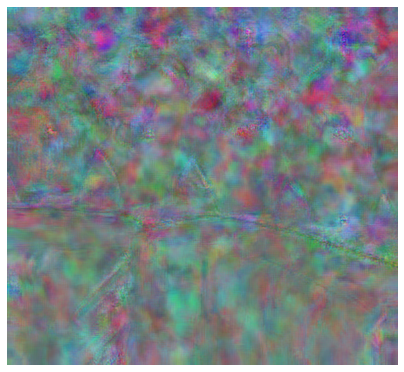

dcvx_loss:tensor(0.0016) total_loss:tensor(0.0114)


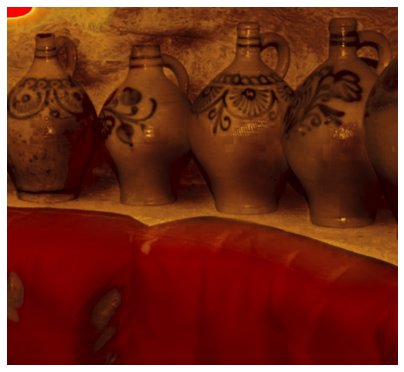

dcvx_loss:tensor(0.0016) total_loss:tensor(0.0090)


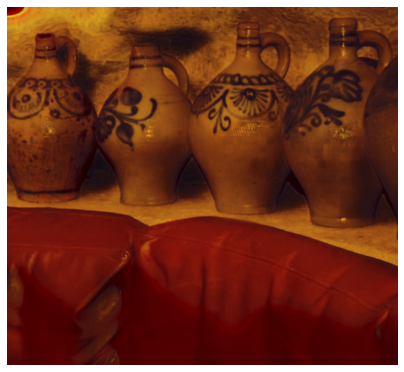

dcvx_loss:tensor(0.0016) total_loss:tensor(0.0080)


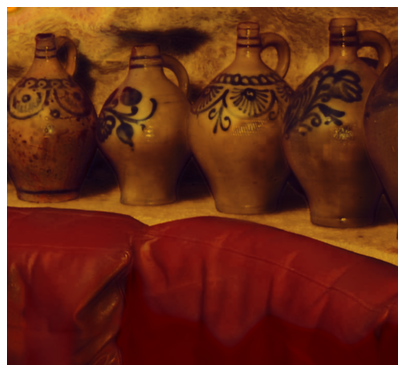

dcvx_loss:tensor(0.0016) total_loss:tensor(0.0078)


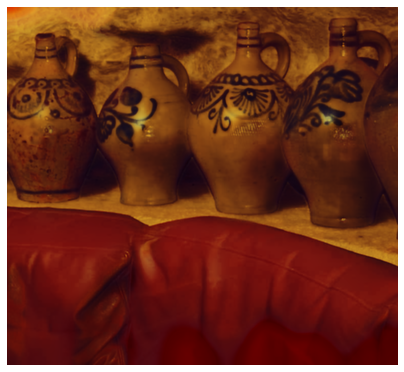

dcvx_loss:tensor(0.0016) total_loss:tensor(0.0073)


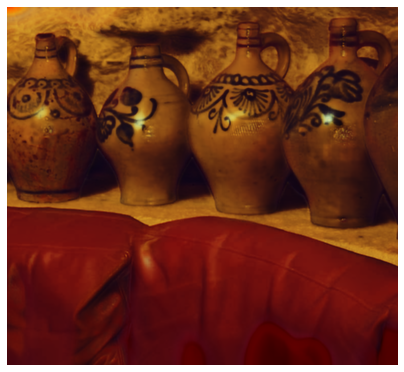

dcvx_loss:tensor(0.0016) total_loss:tensor(0.0071)


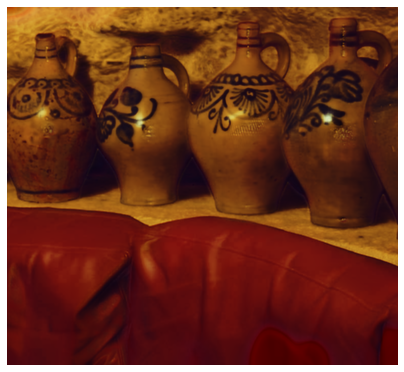

dcvx_loss:tensor(0.0016) total_loss:tensor(0.0071)


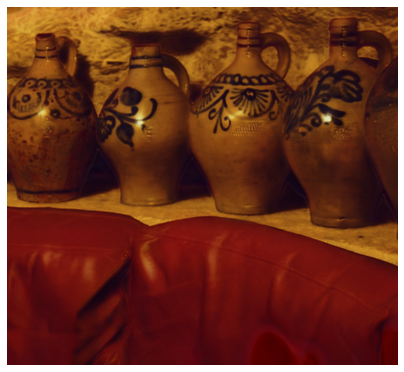

dcvx_loss:tensor(0.0016) total_loss:tensor(0.0071)


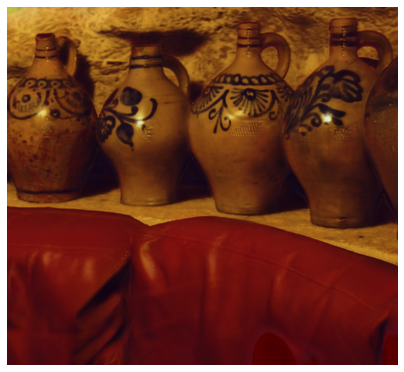

dcvx_loss:tensor(0.0016) total_loss:tensor(0.0069)


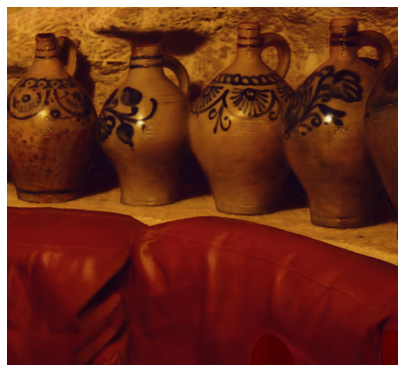

dcvx_loss:tensor(0.0016) total_loss:tensor(0.0068)


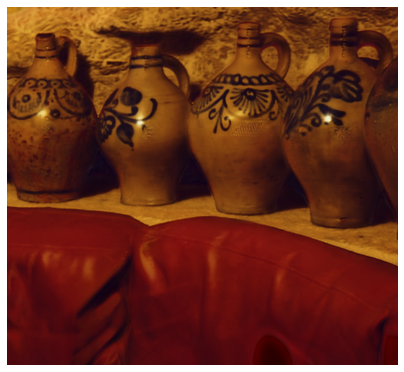

dcvx_loss:tensor(0.0015) total_loss:tensor(0.0072)


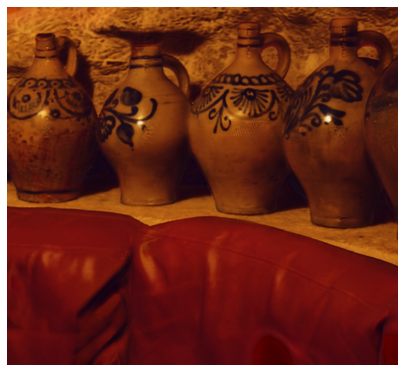

dcvx_loss:tensor(0.0015) total_loss:tensor(0.0067)


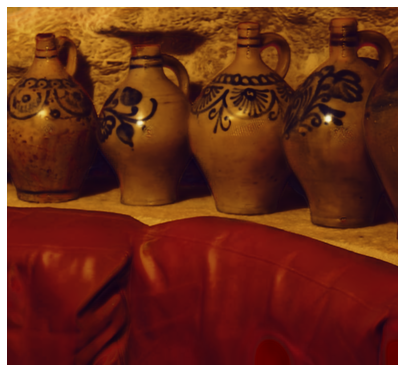

In [7]:
net_input_saved = net_input.detach().clone()
noise = net_input.detach().clone()


i = 0

stop_dcvx =0
def closure():
    
    global i, net_input, dcvx_, stop_dcvx 
    
    if reg_noise_std > 0:
        net_input = net_input_saved + (noise.normal_() * reg_noise_std)
    
    out = net(net_input)
   
    total_loss = mse(out, img_noflash_var)
    if dcvx_ and not stop_dcvx:
        dcvx_loss = dcvx(parameters)*dcvx_coeff
        if i%50==0:
            print("dcvx_loss:"+str(dcvx_loss.data.cpu())+ " total_loss:"+str(total_loss.data.cpu()))
            if dcvx_loss.data.cpu()> total_loss.data.cpu():
                stop_dcvx = 1
        #total_loss += dcvx_loss
            
        dcvx_loss += total_loss
        dcvx_loss.backward()
    else:
        total_loss.backward()
    

    print ('Iteration %05d    Loss %f' % (i, total_loss.item()), '\r', end='')
    if  PLOT and i % show_every == 0:
        out_np = torch_to_np(out)
        filename = "result/flash/flash_iter"+str(i)
        if dcvx_:filename = filename+"_dcvx_"+str(dcvx_coeff)
        filename = filename+".jpg"
        plot_image_grid([np.clip(out_np, 0, 1)], factor=figsize, nrow=1,name=filename)
       
        
        #plt.imshow(np.clip(out_np, 0, 1))
        #plt.savefig(filename)
    i += 1

    return total_loss

p = get_params(OPT_OVER, net, net_input)
optimize(OPTIMIZER, p, closure, LR, num_iter)

In [8]:
# plt.savefig('jq_flash.pdf')

PermissionError: [Errno 13] Permission denied: 'jq_flash.pdf'

<Figure size 432x288 with 0 Axes>

Sometimes the process stucks at reddish image, just run the code from the top one more time. 

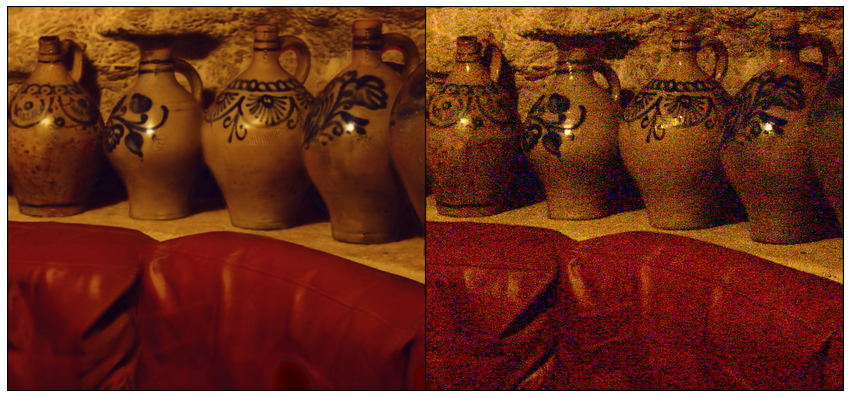

In [9]:
out_np = torch_to_np(net(net_input))
q = plot_image_grid([np.clip(out_np, 0, 1), img_noflash_np], factor=13);